# Pitch sequency - 1 try

1- Using the Attack Zones: **Heart, Shadow, Chase and Waste**. Sub divide this zones in three or six zones, like three vertical lines and 6 horizontal lines, all equal. 
- I divide it in 9 zones, i cant yet show different pitch groups in the same graph

2- Found what combinantion he use most for strikeouts, for example: 1- Fastball then 2- Changeup

3- Combine the sequency with the zones to find a pattern, looking for tunneling or just the movement in nearby zones and demostrate the efficiency.

In [535]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.table import Table
import seaborn as sns
import numpy as np
from math import sqrt, atan, degrees

mlb_2022 = pd.read_csv('skubal-2024.csv')
fastballs_data = mlb_2022[mlb_2022['pitch_group'] == 'Fastballs']

In [536]:
def draw_sz(sz_top=3.5, sz_bot=1.5, ls='k-'):
  """
  draw strike zone  
  draw the strike zone on a plot using mpl  
  inputs:
    sz_top: top of strike zone (ft) 
    sz_bot: bottom of strike zone (ft) 
    ls: linestyle (use `plt.plot()` linestyle conventions)  
  output:
    strike zone plot
  """
  plt.plot([-0.708, 0.708], [sz_bot,sz_bot], ls)
  plt.plot([-0.708, -0.708], [sz_bot,sz_top], ls)
  plt.plot([0.708, 0.708], [sz_bot,sz_top], ls)
  plt.plot([-0.708, 0.708], [sz_top,sz_top], ls) 

def draw_home_plate(catcher_perspective=True, ls='k-'):
  """
  draw home plate from either the catcher perspective or pitcher perspective  
  inputs: 
    catcher_perspective: orient home plate in the catcher POV. if False, orients
      home plate in the pitcher POV.  
    ls: linestyle (use `plt.plot()` linestyle conventions)  
  output:
    home plate plot
  """
  if catcher_perspective:
    plt.plot([-0.708, 0.708], [0,0], ls)
    plt.plot([-0.708, -0.708], [0,-0.3], ls)
    plt.plot([0.708, 0.708], [0,-0.3], ls)
    plt.plot([-0.708, 0], [-0.3, -0.6], ls)
    plt.plot([0.708, 0], [-0.3, -0.6], ls)
  else: 
    plt.plot([-0.708, 0.708], [0,0], ls)
    plt.plot([-0.708, -0.708], [0,0.1], ls)
    plt.plot([0.708, 0.708], [0,0.1], ls)
    plt.plot([-0.708, 0], [0.1, 0.3], ls)
    plt.plot([0.708, 0], [0.1, 0.3], ls)

def draw_attack_zones():
  """
  draw attack zones 
  draw the statcast attack zones on a plot using mpl  
  """

  # outer heart / inner shadow
  plt.plot([-0.558, 0.558], [1.833,1.833], color=(227/255, 150/255, 255/255), ls='-', lw=3)
  plt.plot([-0.558, -0.558], [1.833,3.166], color=(227/255, 150/255, 255/255), ls='-', lw=3)
  plt.plot([0.558, 0.558], [1.833,3.166], color=(227/255, 150/255, 255/255), ls='-', lw=3)
  plt.plot([-0.558, 0.558], [3.166,3.166], color=(227/255, 150/255, 255/255), ls='-', lw=3) 

  # outer shadow /  inner chase 
  plt.plot([-1.108, 1.108], [1.166,1.166], color=(255/255, 197/255, 150/255), ls='-', lw=3)
  plt.plot([-1.108, -1.108], [1.166,3.833], color=(255/255, 197/255, 150/255), ls='-', lw=3)
  plt.plot([1.108, 1.108], [1.166,3.833], color=(255/255, 197/255, 150/255), ls='-', lw=3)
  plt.plot([-1.108, 1.108], [3.833,3.833], color=(255/255, 197/255, 150/255), ls='-', lw=3) 

  # outer chase 
  plt.plot([-1.666, 1.666], [0.5,0.5], color=(209/255, 209/255, 209/255), ls='-', lw=3)
  plt.plot([-1.666, -1.666], [0.5,4.5], color=(209/255, 209/255, 209/255), ls='-', lw=3)
  plt.plot([1.666, 1.666], [0.5,4.5], color=(209/255, 209/255, 209/255), ls='-', lw=3)
  plt.plot([-1.666, 1.666], [4.5,4.5], color=(209/255, 209/255, 209/255), ls='-', lw=3)

In [537]:
def draw_grid_quadrants():
    """
    Draw vertical and horizontal grid lines that divide the plot into 9 equal quadrants
    based on the given horizontal and vertical bounds.
    """
    # Define the total horizontal and vertical bounds
    horizontal_bounds = [-1.6, 1.6]  # X-axis limits (Horizontal distance)
    vertical_bounds = [0.6, 4.4]     # Y-axis limits (Vertical distance)

    # Calculate step size for horizontal and vertical lines (divide into 3 equal parts)
    vertical_step = (vertical_bounds[1] - vertical_bounds[0]) / 3
    horizontal_step = (horizontal_bounds[1] - horizontal_bounds[0]) / 3

    # Draw horizontal lines
    for i in range(1, 3):
        y = vertical_bounds[0] + i * vertical_step
        plt.plot(horizontal_bounds, [y, y], color='red', linestyle='--')

    # Draw vertical lines
    for i in range(1, 3):
        x = horizontal_bounds[0] + i * horizontal_step
        plt.plot([x, x], vertical_bounds, color='red', linestyle='--')


In [538]:
def classify_zones(fastballs_data):
    """
    Classify each pitch in fastballs_data into attack zones and new zones (Upper, Center, Lower).
    """
    # Define the criteria for the new zones based on plate_z
    #fastballs_data['new_zone'] = 'Center'  # Zona por defecto

    # Definir condiciones para cada cuadrante
    # Quadrant 1: Upper Left
    # Adjust these bounds if necessary to cover the correct areas.
    left_bound = -1.6
    right_bound = 1.6
    center_left_x = -0.533
    center_right_x = 0.533

    upper_bound = 4.4
    lower_bound = 0.6
    middle_upper_z = 3.166
    middle_lower_z = 1.833

# Define conditions for each quadrant

# Quadrant 1: Upper Left
    fastballs_data.loc[(fastballs_data['plate_x'] <= center_left_x) & (fastballs_data['plate_z'] > middle_upper_z), 'new_zone'] = 'Upper Left'

# Quadrant 2: Upper Center
    fastballs_data.loc[(fastballs_data['plate_x'] > center_left_x) & (fastballs_data['plate_x'] <= center_right_x) & (fastballs_data['plate_z'] > middle_upper_z), 'new_zone'] = 'Upper Center'

# Quadrant 3: Upper Right
    fastballs_data.loc[(fastballs_data['plate_x'] > center_right_x) & (fastballs_data['plate_x'] <= right_bound) & (fastballs_data['plate_z'] > middle_upper_z), 'new_zone'] = 'Upper Right'

# Quadrant 4: Center Left
    fastballs_data.loc[(fastballs_data['plate_x'] <= center_left_x) & (fastballs_data['plate_z'] <= middle_upper_z) & (fastballs_data['plate_z'] >= middle_lower_z), 'new_zone'] = 'Center Left'

# Quadrant 5: Center (make sure this zone fully covers the center)
    fastballs_data.loc[(fastballs_data['plate_x'] > center_left_x) & (fastballs_data['plate_x'] <= center_right_x) & (fastballs_data['plate_z'].between(middle_lower_z, middle_upper_z)), 'new_zone'] = 'Center'

# Quadrant 6: Center Right
    fastballs_data.loc[(fastballs_data['plate_x'] > center_right_x) & (fastballs_data['plate_x'] <= right_bound) & (fastballs_data['plate_z'].between(middle_lower_z, middle_upper_z)), 'new_zone'] = 'Center Right'

# Quadrant 7: Lower Left
    fastballs_data.loc[(fastballs_data['plate_x'] <= center_left_x) & (fastballs_data['plate_z'] < middle_lower_z) & (fastballs_data['plate_z'] >= lower_bound), 'new_zone'] = 'Lower Left'

# Quadrant 8: Lower Center
    fastballs_data.loc[(fastballs_data['plate_x'] > center_left_x) & (fastballs_data['plate_x'] <= center_right_x) & (fastballs_data['plate_z'] < middle_lower_z) & (fastballs_data['plate_z'] >= lower_bound), 'new_zone'] = 'Lower Center'

# Quadrant 9: Lower Right
    fastballs_data.loc[(fastballs_data['plate_x'] > center_right_x) & (fastballs_data['plate_x'] <= right_bound) & (fastballs_data['plate_z'] < middle_lower_z) & (fastballs_data['plate_z'] >= lower_bound), 'new_zone'] = 'Lower Right'

    # Classify into attack zones
    fastballs_data['attack_zone'] = 'Waste'
    fastballs_data.loc[(fastballs_data['plate_x'].between(-0.558, 0.558)) & (fastballs_data['plate_z'].between(1.833, 3.166)), 'attack_zone'] = 'Heart'
    fastballs_data.loc[(fastballs_data['plate_x'].between(-1.108, 1.108)) & (fastballs_data['plate_z'].between(1.166, 3.833)) & (~fastballs_data['attack_zone'].isin(['Heart'])), 'attack_zone'] = 'Shadow'
    fastballs_data.loc[(fastballs_data['plate_x'].between(-1.666, 1.666)) & (fastballs_data['plate_z'].between(0.5, 4.5)) & (~fastballs_data['attack_zone'].isin(['Heart', 'Shadow'])), 'attack_zone'] = 'Chase'
    
    return fastballs_data


C:\Users\luism\AppData\Local\Temp\ipykernel_7188\283368917.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fastballs_data.loc[(fastballs_data['plate_x'] <= center_left_x) & (fastballs_data['plate_z'] > middle_upper_z), 'new_zone'] = 'Upper Left'
C:\Users\luism\AppData\Local\Temp\ipykernel_7188\283368917.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fastballs_data['attack_zone'] = 'Waste'


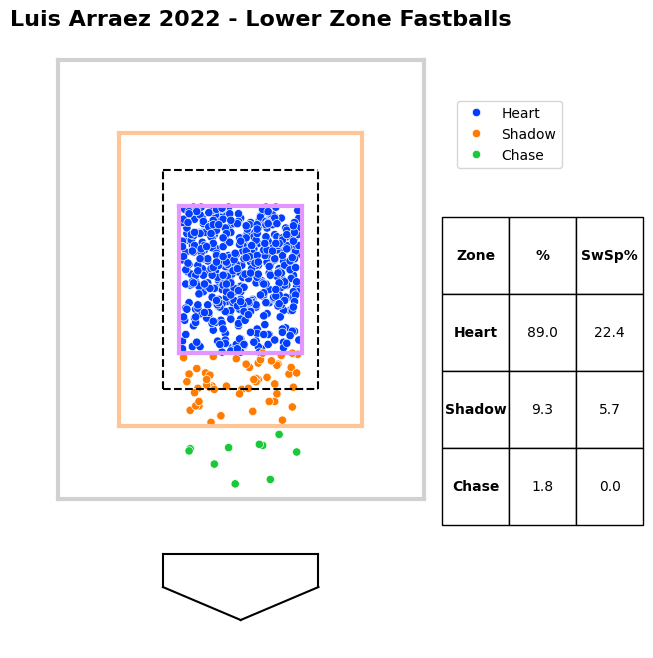

In [539]:

# Filtrar solo Fastballs
fastballs_data = mlb_2022[mlb_2022['pitch_group'] == 'Fastballs']

# Clasificar las zonas
fastballs_data = classify_zones(fastballs_data)

# Filtrar solo los datos de la zona Lower
selected_zones = ['Center', 'Lower Center']
filtered_zone_data = fastballs_data[fastballs_data['new_zone'].isin(selected_zones)]

# Contar zonas
zone_counts = filtered_zone_data['attack_zone'].value_counts(normalize=True) * 100
zone_percentages = zone_counts.reset_index()
zone_percentages.columns = ['Zone', '%']

# Calcular el porcentaje de Sweet Spot en cada zona
percentage_table = pd.crosstab(filtered_zone_data['attack_zone'], filtered_zone_data['launch_angle_group'], normalize='index') * 100

# Extraer los porcentajes de Sweet Spot para cada zona
zones = ['Heart', 'Shadow', 'Chase', 'Waste']
sweet_spot_percentages = percentage_table['Sweet Spot'].reindex(zones, fill_value=0).reset_index()
sweet_spot_percentages.columns = ['Zone', 'SwSp%']

# Combinar los porcentajes en una sola tabla
combined_percentages = pd.merge(zone_percentages, sweet_spot_percentages, on='Zone')

# Formatear los valores para mostrar solo un decimal
combined_percentages['%'] = combined_percentages['%'].map('{:.1f}'.format)
combined_percentages['SwSp%'] = combined_percentages['SwSp%'].map('{:.1f}'.format)

# Visualización solo con datos de la zona Lower
fig = plt.figure(figsize=(8, 8))
fig = sns.scatterplot(data=filtered_zone_data, x='plate_x', y='plate_z', hue='attack_zone', palette='bright')

draw_sz(ls='k--')
draw_home_plate()
draw_attack_zones()
#draw_full_grid_lines_from_heart()  # Solo se dibujarán las líneas horizontales

fig.set_aspect('equal')
plt.legend(bbox_to_anchor=(1.02, 0.90), loc=2)
plt.title('Luis Arraez 2022 - Lower Zone Fastballs', fontsize=16, loc='center', pad=5, y=1, x=0.55, weight='bold')
plt.xlabel('')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

# Mostrar la tabla con los porcentajes
table = plt.table(cellText=combined_percentages.values,
                  colLabels=combined_percentages.columns,
                  cellLoc='center',
                  bbox=(1, .2, 0.5, 0.5))

table.auto_set_font_size(False)
table.set_fontsize(10)

for key, cell in table.get_celld().items():
    if key[0] == 0 or key[1] == 0:
        cell.set_text_props(weight='bold')

# Mostrar el gráfico
plt.show()



In [540]:
def draw_grid_quadrants():
    """
    Draw vertical and horizontal grid lines that divide the plot into 9 equal quadrants
    based on the given horizontal and vertical bounds.
    """
    # Define the total horizontal and vertical bounds
    horizontal_bounds = [-1.6, 1.6]  # X-axis limits (Horizontal distance)
    vertical_bounds = [0.6, 4.4]     # Y-axis limits (Vertical distance)

    # Calculate step size for horizontal and vertical lines (divide into 3 equal parts)
    vertical_step = (vertical_bounds[1] - vertical_bounds[0]) / 3
    horizontal_step = (horizontal_bounds[1] - horizontal_bounds[0]) / 3

    # Draw horizontal lines
    for i in range(1, 3):
        y = vertical_bounds[0] + i * vertical_step
        plt.plot(horizontal_bounds, [y, y], color='red', linestyle='--')

    # Draw vertical lines
    for i in range(1, 3):
        x = horizontal_bounds[0] + i * horizontal_step
        plt.plot([x, x], vertical_bounds, color='red', linestyle='--')

C:\Users\luism\AppData\Local\Temp\ipykernel_7188\3334628648.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quadrant_zone'] = np.select(conditions, zone_labels, default='Outside')


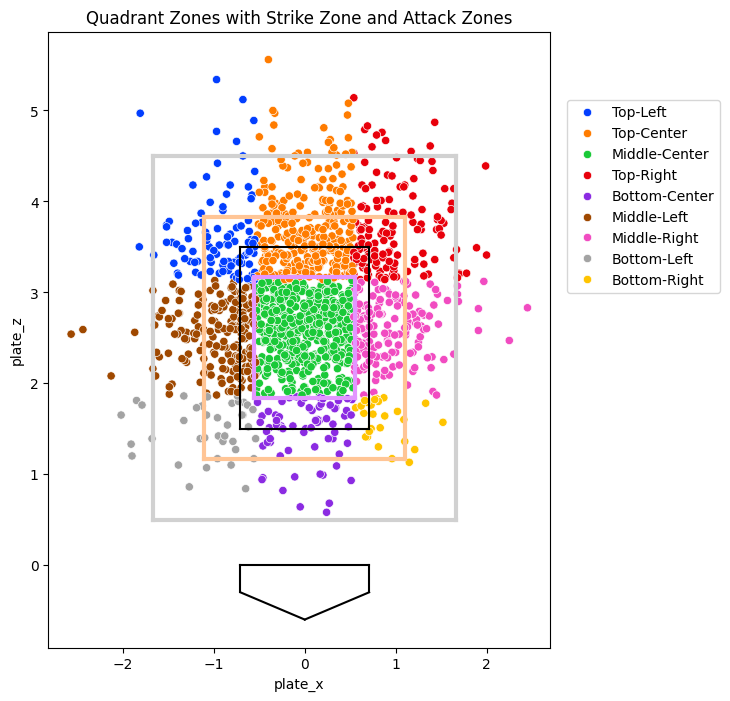

In [541]:
def label_quadrant_zones(df):
    """
    Label each pitch based on its location within the 9 zones defined by horizontal and vertical grid lines.
    The zones are named as 'Top-Left', 'Top-Center', 'Top-Right', 'Middle-Left', etc.
    """
    # Define the horizontal and vertical boundaries for the zones
    horizontal_bounds = [-1.6, 1.6]
    vertical_bounds = [0.6, 4.4]
    
    # Calculate step sizes for each zone (split into 3 equal parts)
    vertical_step = (vertical_bounds[1] - vertical_bounds[0]) / 3
    horizontal_step = (horizontal_bounds[1] - horizontal_bounds[0]) / 3

    # Define the labels for each of the 9 zones
    zone_labels = [
        'Top-Left', 'Top-Center', 'Top-Right',
        'Middle-Left', 'Middle-Center', 'Middle-Right',
        'Bottom-Left', 'Bottom-Center', 'Bottom-Right'
    ]

    # Create conditions for each zone
    conditions = [
        # Top row
        (df['plate_x'] < horizontal_bounds[0] + horizontal_step) & (df['plate_z'] > vertical_bounds[0] + 2 * vertical_step),
        (df['plate_x'].between(horizontal_bounds[0] + horizontal_step, horizontal_bounds[0] + 2 * horizontal_step)) & (df['plate_z'] > vertical_bounds[0] + 2 * vertical_step),
        (df['plate_x'] > horizontal_bounds[0] + 2 * horizontal_step) & (df['plate_z'] > vertical_bounds[0] + 2 * vertical_step),
        
        # Middle row
        (df['plate_x'] < horizontal_bounds[0] + horizontal_step) & (df['plate_z'].between(vertical_bounds[0] + vertical_step, vertical_bounds[0] + 2 * vertical_step)),
        (df['plate_x'].between(horizontal_bounds[0] + horizontal_step, horizontal_bounds[0] + 2 * horizontal_step)) & (df['plate_z'].between(vertical_bounds[0] + vertical_step, vertical_bounds[0] + 2 * vertical_step)),
        (df['plate_x'] > horizontal_bounds[0] + 2 * horizontal_step) & (df['plate_z'].between(vertical_bounds[0] + vertical_step, vertical_bounds[0] + 2 * vertical_step)),
        
        # Bottom row
        (df['plate_x'] < horizontal_bounds[0] + horizontal_step) & (df['plate_z'] < vertical_bounds[0] + vertical_step),
        (df['plate_x'].between(horizontal_bounds[0] + horizontal_step, horizontal_bounds[0] + 2 * horizontal_step)) & (df['plate_z'] < vertical_bounds[0] + vertical_step),
        (df['plate_x'] > horizontal_bounds[0] + 2 * horizontal_step) & (df['plate_z'] < vertical_bounds[0] + vertical_step)
    ]

    # Apply the labels based on the conditions
    df['quadrant_zone'] = np.select(conditions, zone_labels, default='Outside')
    
    return df

# Apply the function to label the zones in your dataset
fastballs_data = label_quadrant_zones(fastballs_data)

# Example of visualizing the 9 zones with the grid and labels
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=fastballs_data, x='plate_x', y='plate_z', hue='quadrant_zone', palette='bright')

# Draw the strike zone
draw_sz()

# Draw the attack zones
draw_attack_zones()

# Draw the grid that divides the space into 9 zones
#draw_grid_quadrants()

# Add the home plate
draw_home_plate()

plt.legend(bbox_to_anchor=(1.02,0.90), loc=2)
plt.gca().set_aspect('equal')
plt.title('Quadrant Zones with Strike Zone and Attack Zones')

plt.show()
